In [1]:
%pip install -q keras-nightly
%pip install tensorflow tensorflow-gpu pandas matplotlib sklearn
%pip list

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
aiofiles                     23.2.1
aiohttp                      3.9.3
aiosignal                    1.3.1
altair                       5.3.0
annotated-types              0.6.0
anyio                        4.3.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.6.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.1.1
cycler                       

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import pandas as pd
import tensorflow as tf
import numpy as np
import keras

In [7]:
df = pd.read_csv('../jigsaw-toxic-comment-classification-challenge/train.csv/train2.csv')

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
from keras.layers import TextVectorization

In [10]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
MAX_FEATURES = 200000

In [13]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [14]:
vectorizer.adapt(X.values)

In [15]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([286, 276, 293,   9, 273], dtype=int64)>

In [16]:
vectorized_text = vectorizer(X.values)

In [17]:
vectorized_text

<tf.Tensor: shape=(79998, 1800), dtype=int64, numpy=
array([[   657,     75,      2, ...,      0,      0,      0],
       [139272,     54,   2529, ...,      0,      0,      0],
       [   393,    433,     70, ...,      0,      0,      0],
       ...,
       [   147,    230,    238, ...,      0,      0,      0],
       [    15,    514,      3, ...,      0,      0,      0],
       [   124,      7,     13, ...,      0,      0,      0]], dtype=int64)>

In [18]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [19]:
batch_X, batch_y =  dataset.as_numpy_iterator().next()

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
train_g = train.as_numpy_iterator()

In [22]:
train_g.next()

(array([[ 4546,  8642,    28, ...,     0,     0,     0],
        [50144,    36,    14, ...,     0,     0,     0],
        [ 2960,    28,     4, ...,     0,     0,     0],
        ...,
        [  138,  3046,     7, ...,     0,     0,     0],
        [ 6520,     8,   613, ...,     0,     0,     0],
        [   47,   107,   243, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [24]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(train, epochs=1, validation_data=val)

3500/3500 ━━━━━━━━━━━━━━━━━━━━ 3373s 960ms/step - accuracy: 0.9291 - loss: 0.1001 - val_accuracy: 0.9948 - val_loss: 0.0493


In [28]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

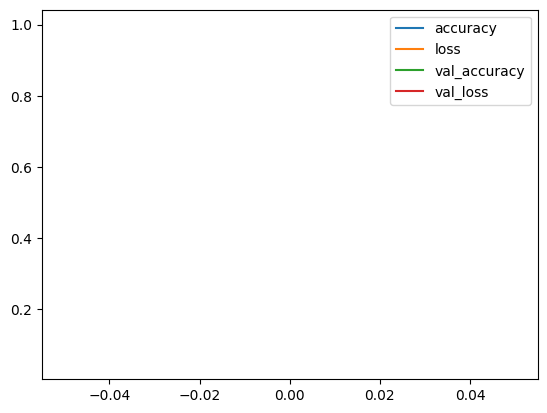

In [29]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [30]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [52]:
res = model.predict(np.array([input_text]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [53]:
res

array([[0.9764725 , 0.20472333, 0.7983674 , 0.08942761, 0.7060888 ,
        0.18254201]], dtype=float32)

In [35]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [36]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [37]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [38]:
res.shape

(1, 6)

# 4. Evaluate Model

In [39]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [42]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8450210094451904, Recall:0.673560619354248, Accuracy:0.49399998784065247


# 5. Test and Gradio

In [43]:
import keras
import tensorflow as tf

In [44]:
tf.saved_model.save(model, 'toxicity')

INFO:tensorflow:Assets written to: toxicity\assets


INFO:tensorflow:Assets written to: toxicity\assets


In [45]:
input_str = vectorizer('hey i freaken hate you!')

In [58]:
model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


array([[0.6371616 , 0.01179239, 0.17215322, 0.02168184, 0.28855366,
        0.07379763]], dtype=float32)

In [54]:
loaded_model = keras.layers.TFSMLayer("toxicity", call_endpoint="serving_default")

In [57]:
loaded_model(np.expand_dims(input_str,0))['output_0'].numpy()

array([[0.6371616 , 0.01179239, 0.17215322, 0.02168184, 0.28855366,
        0.07379763]], dtype=float32)

In [59]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [60]:
print("Training loss:", history.history['loss'])
print("Training accuracy:", history.history['accuracy'])
print("Validation loss:", history.history['val_loss'])
print("Validation accuracy:", history.history['val_accuracy'])

Training loss: [0.07140100747346878]
Training accuracy: [0.9721428751945496]
Validation loss: [0.04928025230765343]
Validation accuracy: [0.9947500228881836]


# 6. Train continute with new data

In [143]:
import tensorflow as tf

In [141]:
# h1 = tf.saved_model.load('toxicity')

# # Trích xuất biến của mô hình
# h2 = h1.signatures['serving_default']
# h2(inputs=np.expand_dims(input_str,0))['output_0'].numpy()

In [71]:
y_new = (loaded_model(np.expand_dims(input_str,0))['output_0'].numpy() > 0.5).astype(int)

In [81]:
vectorized_text_new = vectorizer(['hey i freaken hate you!'])

In [125]:
X = df['comment_text'].values
y = df[df.columns[2:]].values
# print(X[0])
print(y)
print(y_new) # checked
print(vectorized_text)
print(vectorized_text_new)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[1 0 0 0 0 0]]
tf.Tensor(
[[   657     75      2 ...      0      0      0]
 [139272     54   2529 ...      0      0      0]
 [   393    433     70 ...      0      0      0]
 ...
 [   147    230    238 ...      0      0      0]
 [    15    514      3 ...      0      0      0]
 [   124      7     13 ...      0      0      0]], shape=(79998, 1800), dtype=int64)
tf.Tensor([[393   8   1 ...   0   0   0]], shape=(1, 1800), dtype=int64)


In [126]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
y_new = tf.cast(y_new, tf.int64)
dataset_new = tf.data.Dataset.from_tensor_slices((vectorized_text_new, y_new))
dataset_new = dataset_new.cache()
dataset_new = dataset_new.shuffle(160000)
dataset_new = dataset_new.batch(16)
dataset_new = dataset_new.prefetch(8) # helps bottlenecks

In [128]:
train_new = dataset_new.take(int(len(dataset_new)*.7))
val_new = dataset_new.skip(int(len(dataset_new)*.7)).take(int(len(dataset_new)*.2))

In [170]:
new_model = tf.keras.Sequential([
    loaded_model,
    tf.keras.layers.Embedding(MAX_FEATURES+1, 32),
    tf.keras.layers.Bidirectional(LSTM(32, activation='tanh')),
     tf.keras.layers.Dense(128, activation='relu'),  # Thêm lớp dense mới
    tf.keras.layers.Dense(256, activation='relu'),  # Thêm lớp dense mới
    tf.keras.layers.Dense(128, activation='relu'),  # Thêm lớp dense mới
    tf.keras.layers.Dense(6, activation='sigmoid')  # Thêm lớp dense mới cho đầu ra
])

In [ ]:
new_model.set_weights(loaded_model.get_weights())

In [155]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_model.summary()

In [ ]:
history1 = new_model.fit(train_new, epochs=1, validation_data=val_new)

In [172]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1
Keras version: 3.2.0.dev2024040503
